In [2]:
# Import necessary libraries
import pandas as pd
import glob

# Load each file individually and combine them into a single DataFrame
file_paths = [
    '/content/april_2024.csv',
    '/content/may_2024.csv',
    '/content/june_2024.csv',
    '/content/july_2024.csv',
    '/content/august_2024.csv',
    '/content/september_2024.csv',
    '/content/october_2024.csv'
]

# Combine all the files into one DataFrame
data_frames = [pd.read_csv(file, encoding = 'ISO-8859-1') for file in file_paths]
combined_data = pd.concat(data_frames, ignore_index=True)

# Display the first few rows to confirm
combined_data.head()



,Order #,Sent Date,Modifier,Option Group Name,Parent Menu Selection,Order ID
0,18,2024-04-13 11:34:00,Regular,Noods,Mac and Cheese,13-18
1,18,2024-04-13 11:34:00,Cheddar,Choose Your Cheese,Mac and Cheese,13-18
2,18,2024-04-13 11:34:00,Pulled Pork,Choose Your Meats,Mac and Cheese,13-18
3,18,2024-04-13 11:34:00,Broccoli,Choose Your Toppings,Mac and Cheese,13-18
4,18,2024-04-13 11:34:00,Tomatoes,Choose Your Toppings,Mac and Cheese,13-18


In [3]:
# Convert 'Sent Date' column to datetime format
combined_data['Sent Date'] = pd.to_datetime(combined_data['Sent Date'], errors='coerce')

# Drop any rows where 'Sent Date' couldn't be parsed
combined_data.dropna(subset=['Sent Date'], inplace=True)

# Add columns for month, day of the week, and hour for trend analysis
combined_data['Month'] = combined_data['Sent Date'].dt.month_name()
combined_data['DayOfWeek'] = combined_data['Sent Date'].dt.day_name()
combined_data['Hour'] = combined_data['Sent Date'].dt.hour


In [4]:
combined_data.head()

,Order #,Sent Date,Modifier,Option Group Name,Parent Menu Selection,Order ID,Month,DayOfWeek,Hour
0,18,2024-04-13 11:34:00,Regular,Noods,Mac and Cheese,13-18,April,Saturday,11
1,18,2024-04-13 11:34:00,Cheddar,Choose Your Cheese,Mac and Cheese,13-18,April,Saturday,11
2,18,2024-04-13 11:34:00,Pulled Pork,Choose Your Meats,Mac and Cheese,13-18,April,Saturday,11
3,18,2024-04-13 11:34:00,Broccoli,Choose Your Toppings,Mac and Cheese,13-18,April,Saturday,11
4,18,2024-04-13 11:34:00,Tomatoes,Choose Your Toppings,Mac and Cheese,13-18,April,Saturday,11


In [5]:
popular_items = combined_data['Parent Menu Selection'].value_counts()
print("Most Popular Items:")
print(popular_items.head(10))

Most Popular Items:
Parent Menu Selection
Mac and Cheese                                        245397
Grilled Cheese Sandwich                                20195
MIX                                                     6979
Sides/Desserts                                           883
Drinks                                                   449
Mac and Cheese Party Tray (Plus FREE Garlic Bread)        94
Garlic Bread (Party Size)                                 10
Name: count, dtype: int64


In [6]:
aggie_bowl_popularity = combined_data[combined_data['Parent Menu Selection'] == 'Aggie Bowl']
aggie_bowl_count = aggie_bowl_popularity.shape[0]
print(f"The 'Aggie Bowl' has been ordered {aggie_bowl_count} times.")


The 'Aggie Bowl' has been ordered 0 times.


In [7]:
# Monthly order trends
monthly_trends = combined_data['Month'].value_counts()
print("Monthly Order Trends:")
print(monthly_trends)

# Weekly order trends
weekly_trends = combined_data['DayOfWeek'].value_counts()
print("Weekly Order Trends:")
print(weekly_trends)

# Hourly order trends
hourly_trends = combined_data['Hour'].value_counts()
print("Hourly Order Trends:")
print(hourly_trends)


Monthly Order Trends:
Month
April        50000
September    47511
May          47508
October      41649
August       40374
July         25683
June         21282
Name: count, dtype: int64
Weekly Order Trends:
DayOfWeek
Saturday     48914
Sunday       43742
Friday       41110
Thursday     37384
Wednesday    37052
Tuesday      34114
Monday       31691
Name: count, dtype: int64
Hourly Order Trends:
Hour
12    35272
19    35186
18    31468
13    29205
17    25046
14    24916
11    23069
20    21992
15    21483
16    20472
21     4851
22      620
10      360
9        44
0        15
7         8
Name: count, dtype: int64


In [8]:
# Count orders by hour to identify peak demand times, which may correlate with bottlenecks
hourly_order_count = combined_data.groupby('Hour').size()
print("Order Count by Hour:")
print(hourly_order_count.sort_values(ascending=False))


Order Count by Hour:
Hour
12    35272
19    35186
18    31468
13    29205
17    25046
14    24916
11    23069
20    21992
15    21483
16    20472
21     4851
22      620
10      360
9        44
0        15
7         8
dtype: int64


In [9]:
# Count the frequency of each modifier to identify high-demand customizations
modifier_count = combined_data['Modifier'].value_counts()
print("Most Frequent Modifiers:")
print(modifier_count.head(10))


Most Frequent Modifiers:
Modifier
Regular            25787
Cheddar            18119
No Side            17574
No Drink           17049
Parmesan           16423
Breadcrumbs        15195
Brisket             9617
Garlic Parmesan     9273
Grilled Chicken     8802
Onions              8096
Name: count, dtype: int64


In [10]:
# Count items per order ID
order_size = combined_data.groupby('Order ID').size()
print("Average Items per Order:")
print(order_size.describe())  # Summary stats for items per order

# Find times with large orders to identify potential bottlenecks
large_order_times = combined_data[combined_data['Order ID'].isin(order_size[order_size > order_size.mean()].index)]
large_order_times_by_hour = large_order_times['Hour'].value_counts().sort_index()
print("Hours with Large Orders:")
print(large_order_times_by_hour)


Average Items per Order:
count    9073.000000
mean       30.200265
std        24.279660
min         1.000000
25%        10.000000
50%        21.000000
75%        45.000000
max       160.000000
dtype: float64
Hours with Large Orders:
Hour
0         7
9        11
10      309
11    22450
12    34621
13    27352
14    20843
15    15924
16    14310
17    15732
18    17435
19    16344
20     8424
21      400
22       16
Name: count, dtype: int64


In [11]:
# Count orders by day of the week to identify peak days
peak_days = combined_data['DayOfWeek'].value_counts()
print("Orders by Day of the Week:")
print(peak_days)

# Peak times can be further analyzed with this data to optimize staffing
peak_hours = combined_data['Hour'].value_counts().sort_index()
print("Orders by Hour of the Day:")
print(peak_hours)


Orders by Day of the Week:
DayOfWeek
Saturday     48914
Sunday       43742
Friday       41110
Thursday     37384
Wednesday    37052
Tuesday      34114
Monday       31691
Name: count, dtype: int64
Orders by Hour of the Day:
Hour
0        15
7         8
9        44
10      360
11    23069
12    35272
13    29205
14    24916
15    21483
16    20472
17    25046
18    31468
19    35186
20    21992
21     4851
22      620
Name: count, dtype: int64


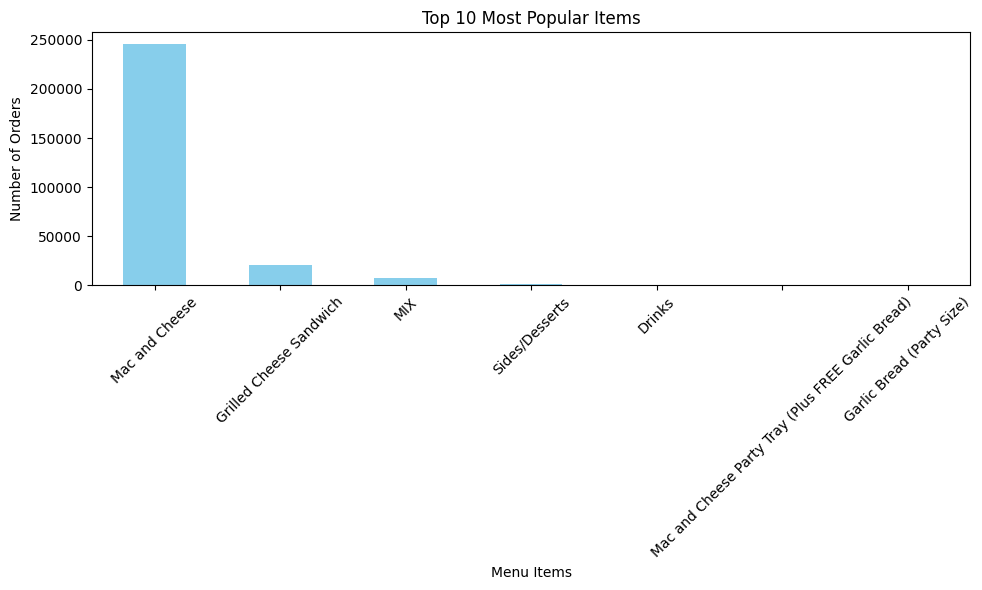

In [12]:
import matplotlib.pyplot as plt

# Plot for popular items (bar chart)
top_items = combined_data['Parent Menu Selection'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Popular Items")
plt.xlabel("Menu Items")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("popular_items.png")
plt.show()


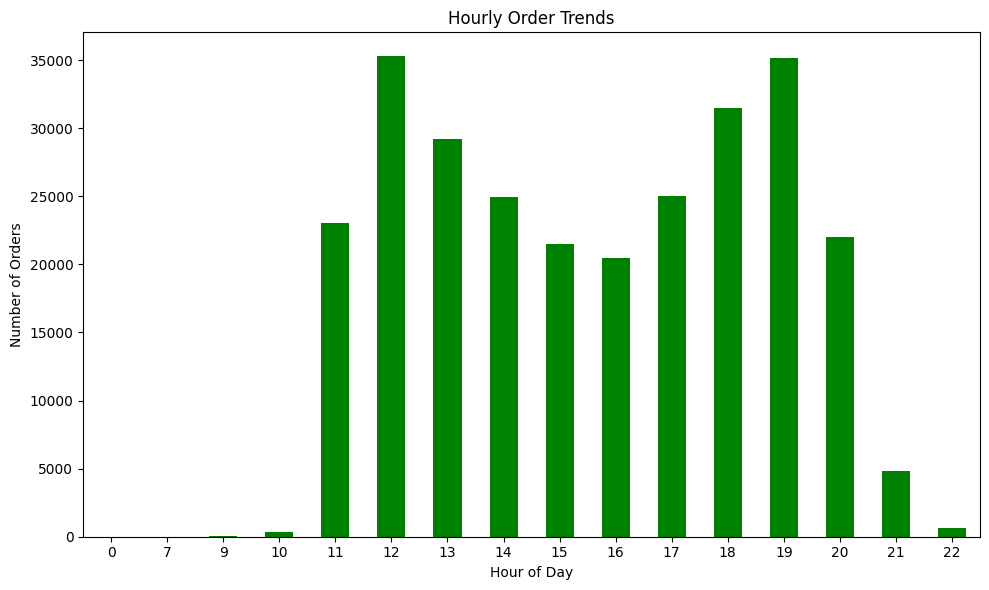

In [13]:
# Plot for hourly order trends
hourly_trends = combined_data['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_trends.plot(kind='bar', color='green')
plt.title("Hourly Order Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("hourly_trends.png")
plt.show()

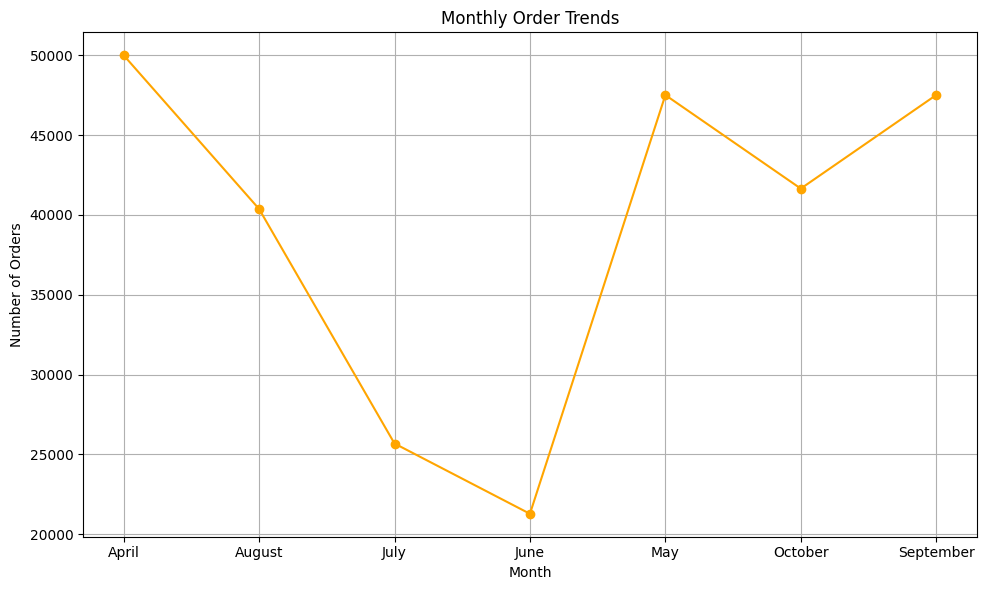

In [14]:
# Plot for monthly order trends
monthly_trends = combined_data['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Order Trends")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_trends.png")
plt.show()


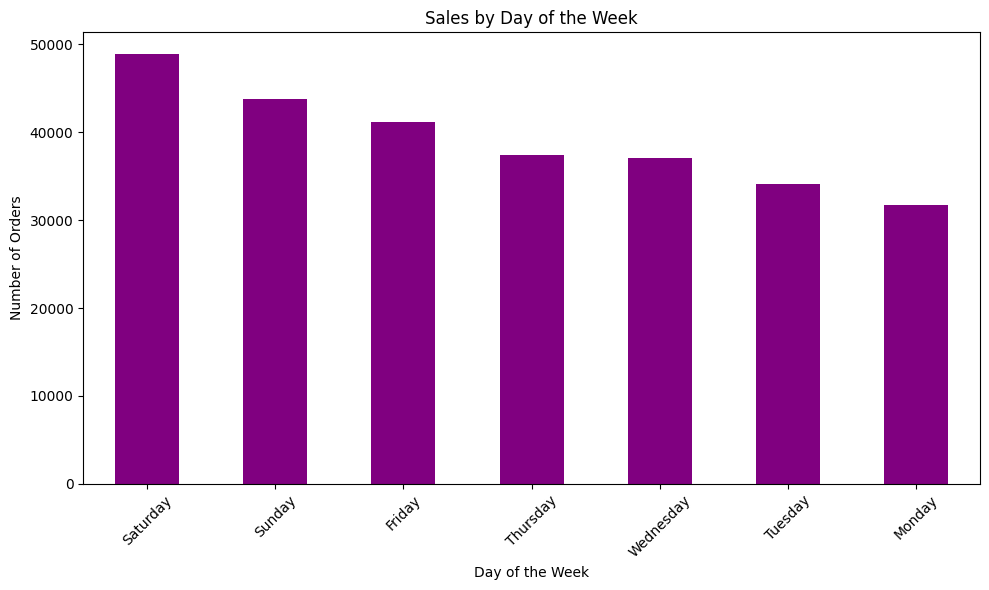

In [15]:
import matplotlib.pyplot as plt

# Plot for sales by day of the week
plt.figure(figsize=(10, 6))
weekly_trends.plot(kind='bar', color='purple')
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("weekly_trends.png")
plt.show()


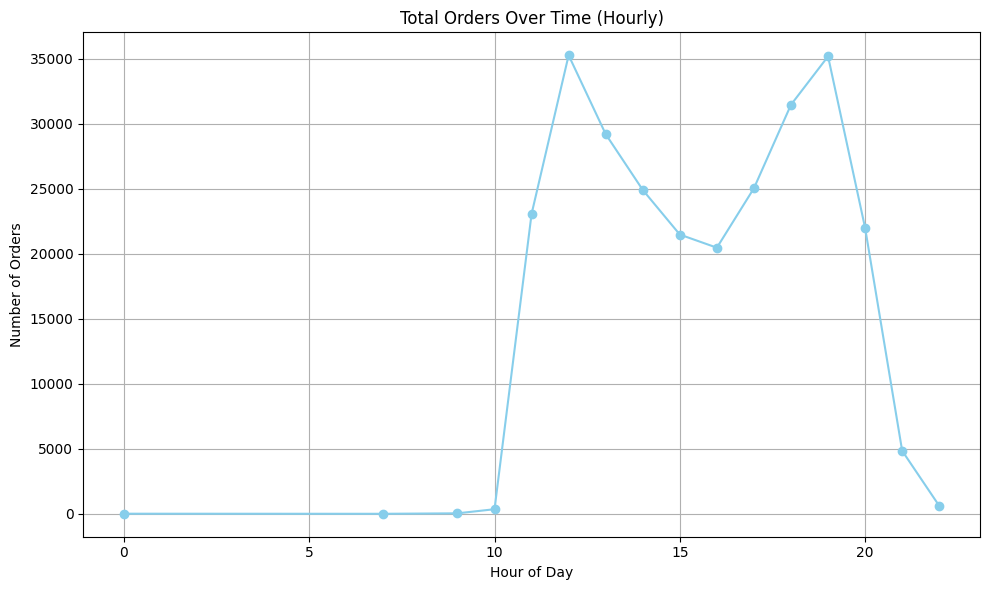

In [16]:
# Plotting hourly order count
plt.figure(figsize=(10, 6))
hourly_order_count.plot(kind='line', marker='o', color='skyblue')
plt.title("Total Orders Over Time (Hourly)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.savefig("sales_over_time.png")
plt.show()


In [17]:
# Calculate average order size by day
avg_order_size_by_day = combined_data.groupby('DayOfWeek').size().mean()
print("Average Order Size by Day:", avg_order_size_by_day)

# Identify most popular combinations
popular_combinations = combined_data.groupby(['Parent Menu Selection', 'Modifier']).size().sort_values(ascending=False).head(10)
print("Popular Item and Modifier Combinations:")
print(popular_combinations)


Average Order Size by Day: 39143.857142857145
Popular Item and Modifier Combinations:
Parent Menu Selection  Modifier       
Mac and Cheese         Regular            25787
                       No Side            16030
                       Parmesan           15689
                       No Drink           15641
                       Cheddar            15079
                       Breadcrumbs        14680
                       Brisket             8836
                       Garlic Parmesan     8662
                       Grilled Chicken     8308
                       Onions              7538
dtype: int64


In [18]:
!pip install prophet

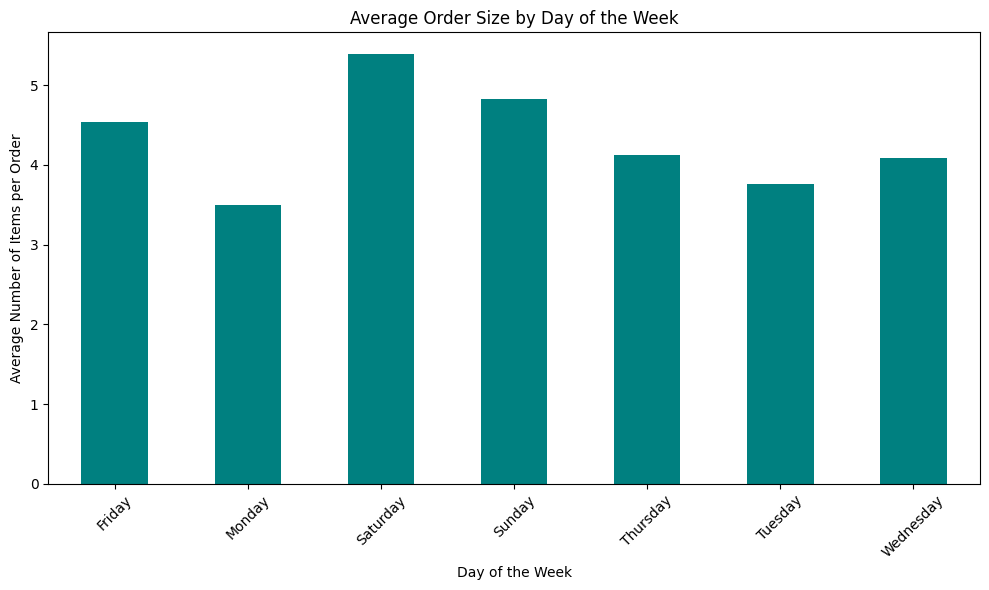

In [19]:
import matplotlib.pyplot as plt

# Calculate the number of items per order for each day of the week
average_order_size_by_day = combined_data.groupby('DayOfWeek').size() / combined_data['Order ID'].nunique()

# Plot average order size by day of the week
plt.figure(figsize=(10, 6))
average_order_size_by_day.plot(kind='bar', color='teal')
plt.title("Average Order Size by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Items per Order")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("average_order_size_by_day.png")
plt.show()


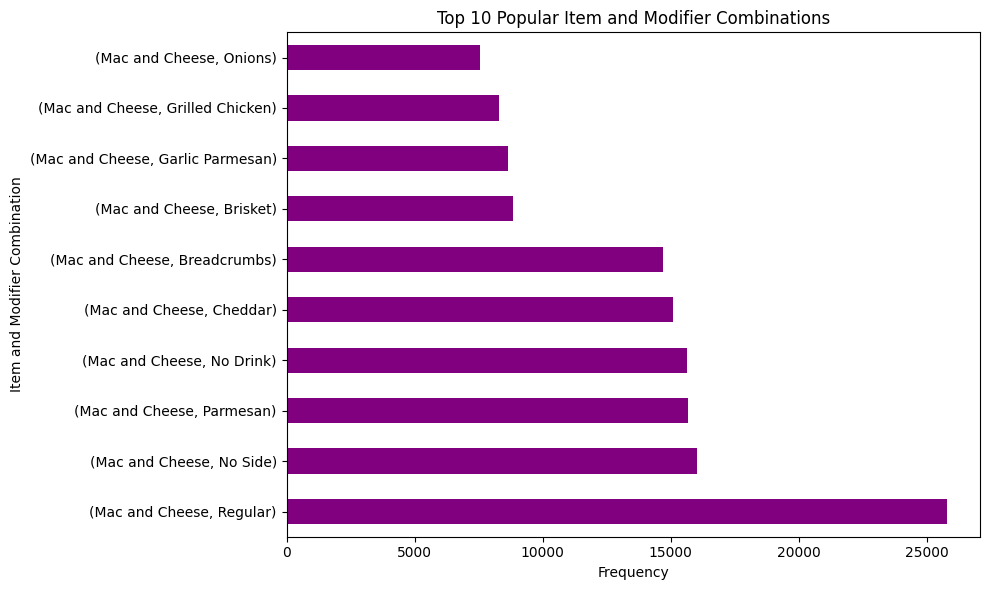

In [23]:
# Calculate the frequency of each item-modifier combination
popular_combinations = combined_data.groupby(['Parent Menu Selection', 'Modifier']).size().sort_values(ascending=False).head(10)

# Plot popular item and modifier combinations
plt.figure(figsize=(10, 6))
popular_combinations.plot(kind='barh', color='purple')
plt.title("Top 10 Popular Item and Modifier Combinations")
plt.xlabel("Frequency")
plt.ylabel("Item and Modifier Combination")
plt.tight_layout()
plt.savefig("popular_item_modifier_combinations.png")
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpef6de93f/jc8z87b6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpef6de93f/tcp8qzey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14973', 'data', 'file=/tmp/tmpef6de93f/jc8z87b6.json', 'init=/tmp/tmpef6de93f/tcp8qzey.json', 'output', 'file=/tmp/tmpef6de93f/prophet_model5hv5p3su/prophet_model-20241110161059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


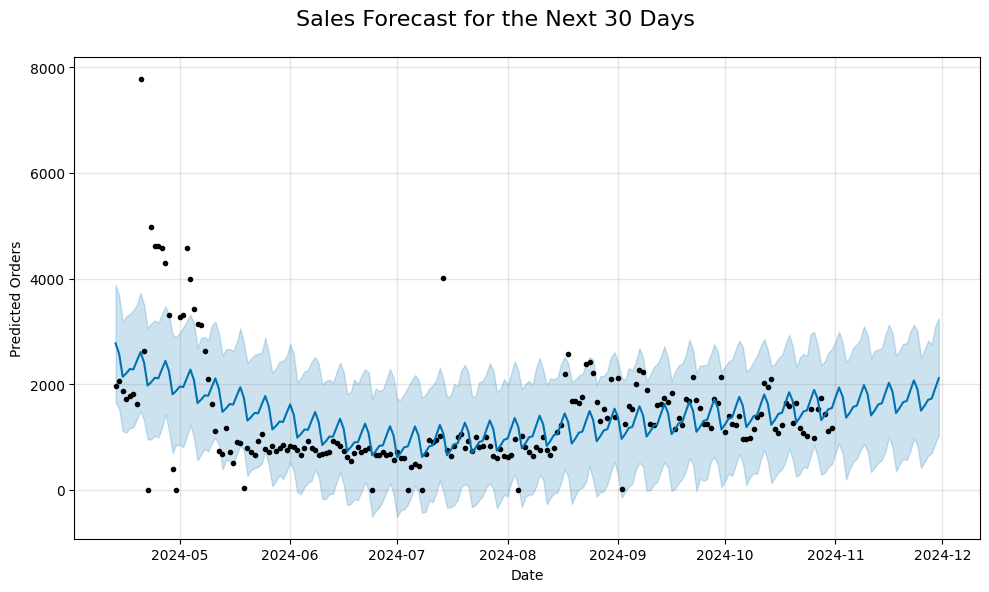

In [25]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Sent Date' is already in datetime format and data is resampled daily
daily_sales = combined_data.resample('D', on='Sent Date').size().reset_index(name='y')
daily_sales.columns = ['ds', 'y']  # Prophet requires columns 'ds' for date and 'y' for target variable

# Initialize and fit the Prophet model
model = Prophet()
model.fit(daily_sales)

# Create a dataframe for the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
fig.suptitle("Sales Forecast for the Next 30 Days", fontsize=16)  # Set the main title with fontsize

# Adjust layout to prevent title cutoff
plt.xlabel("Date")
plt.ylabel("Predicted Orders")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter to add top margin for title
fig.subplots_adjust(top=0.9)  # Add some space above the plot for the title
plt.savefig("adjusted_salesforecast.png")
plt.show()


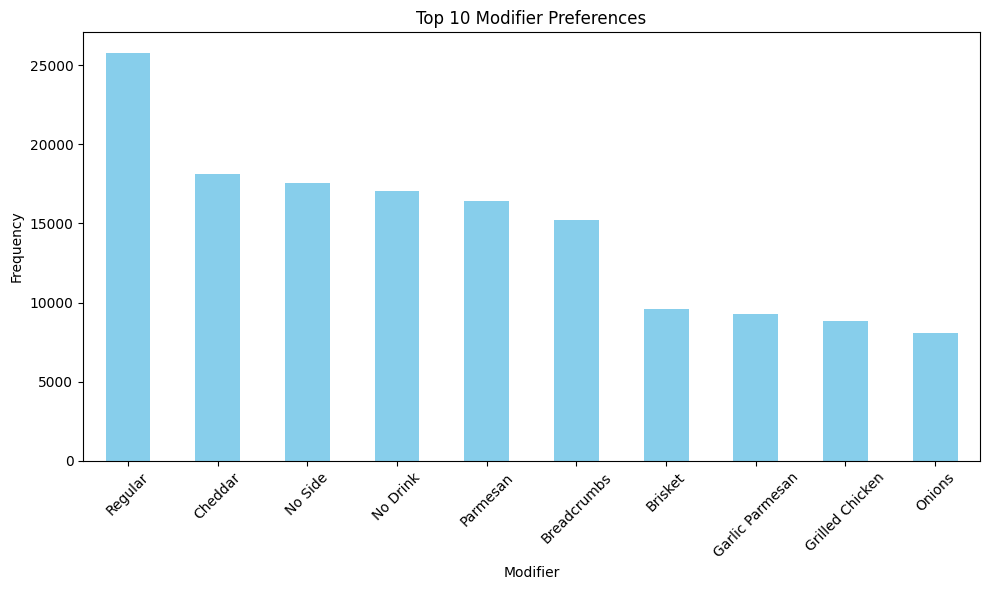

In [22]:
# Calculate frequency of each modifier
modifier_count = combined_data['Modifier'].value_counts().head(10)

# Plot modifier preferences
plt.figure(figsize=(10, 6))
modifier_count.plot(kind='bar', color='skyblue')
plt.title("Top 10 Modifier Preferences")
plt.xlabel("Modifier")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("modifier_preferences.png")
plt.show()
